In [1]:
#1.kutuphaneler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error

In [2]:
# veri yukleme
df=pd.read_csv('HomeSaleData.csv', delimiter=';')
df = df.dropna()

# Price column has TL character  160000. TL
df["Price"]=df["Price"].str.replace("TL","")
df["Price"]=df["Price"].str.replace("\s+","")
df["Price"]=df["Price"].str.replace(".","").astype(float)


C:\Users\Oguzhan\AppData\Local\Temp\ipykernel_23372\2883200088.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Price"]=df["Price"].str.replace("\s+","")
C:\Users\Oguzhan\AppData\Local\Temp\ipykernel_23372\2883200088.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Price"]=df["Price"].str.replace(".","").astype(float)


Text(0, 0.5, 'Sıklık')

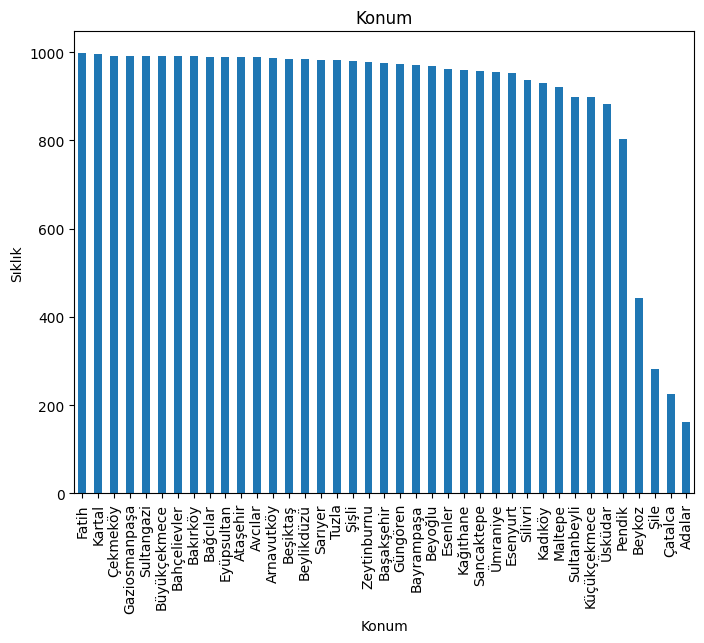

In [3]:
ax=df["District"].value_counts().plot(kind="bar",figsize=(8,6),title="Konum")
ax.set_xlabel("Konum")
ax.set_ylabel("Sıklık")

Text(0, 0.5, 'Sıklık')

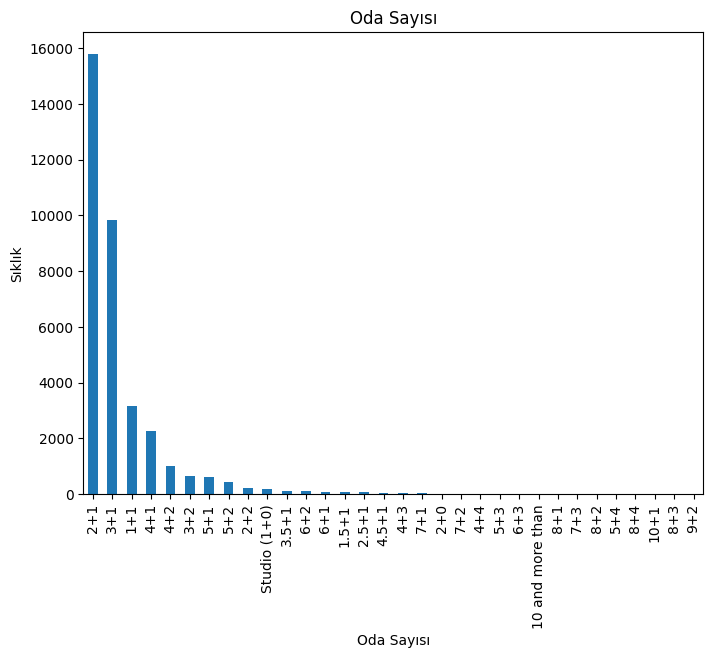

In [4]:
ax=df["Number of rooms"].value_counts().plot(kind="bar",figsize=(8,6),title="Oda Sayısı")
ax.set_xlabel("Oda Sayısı")
ax.set_ylabel("Sıklık")


In [5]:
#Encoding işlemdi Kategorik den nümerik veriye döndürme
label_encoder = LabelEncoder()

categorical_columns = ['District', 'Neighborhood','Number of bathrooms', 'Number of rooms','Number of floors', 'Building Age', 'Floor location', 'From who','Heating','Balcony','Furnished','Using status','Available for Loan','Swap']                  



label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])
    
    
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 34815 entries, 0 to 34842
Columns: 179 entries, District to Pick Up Data Time
dtypes: float64(2), int32(14), int64(161), object(2)
memory usage: 46.0+ MB


In [6]:
#ilk 800 satiri(örneği al)
df=df.head(800)
#veri ön işleme
a=df.iloc[:,0:2]
b=df.iloc[:,4:-1]
x = pd.concat([a, b], axis=1)
y = df.iloc[:,2]
X = x.values
Y = y.values



#verilerin egitim ve test icin bolunmesi
from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=0)

In [7]:
#verilerin olceklenmesi
from sklearn.preprocessing import StandardScaler

sc1=StandardScaler()

x_olcekli = sc1.fit_transform(X)

sc2=StandardScaler()
y_olcekli = np.ravel(sc2.fit_transform(Y.reshape(-1,1)))

#Destek Vektör makine
from sklearn.svm import SVR

svr_reg = SVR(kernel='poly') #rbf linear sigmoid
svr_reg.fit(x_olcekli,y_olcekli)

print('SVR R^2 degeri: ',r2_score(y_olcekli, svr_reg.predict(x_olcekli)))

y_pred_svr = svr_reg.predict(x_olcekli)
y_pred_svr_original_scale = sc2.inverse_transform(y_pred_svr.reshape(-1, 1))

mae_svr = mean_absolute_error(Y, y_pred_svr_original_scale)

print('SVR MAE değeri:', mae_svr)

SVR R^2 degeri:  0.6043898535992259
SVR MAE değeri: 223376.6485322009


In [8]:
#Random Forest Regresyonu
from sklearn.ensemble import RandomForestRegressor
rf_reg=RandomForestRegressor(n_estimators = 8,random_state=0)
rf_reg.fit(X,Y.ravel())
print('Random Forest R2 degeri')
print(r2_score(Y, rf_reg.predict(X)))

mae = mean_absolute_error(Y, rf_reg.predict(X))
print('Random Forest MAE değeri:')
print(mae)


Random Forest R2 degeri
0.9068531897930552
Random Forest MAE değeri:
99178.30140625


In [9]:
#polynomial regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
x_poly = poly_reg.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(x_poly,y)

print('Polynomial R2 degeri:')
print(r2_score(Y, lin_reg.predict(poly_reg.fit_transform(X))))

mae_poly = mean_absolute_error(Y, lin_reg.predict(poly_reg.fit_transform(X)))
print('Polynomial MAE değeri:')
print(mae_poly)

Polynomial R2 degeri:
0.8019083756418168
Polynomial MAE değeri:
220658.0058203125


In [10]:
# Yapay Sinir ağı
import keras
from keras.models import Sequential
from keras.layers import Dense
sc=StandardScaler()

X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

classifier = Sequential()

classifier.add(Dense(88, kernel_initializer = 'he_normal', activation = 'linear' , input_dim = 176))
classifier.add(Dense(88, kernel_initializer = 'he_normal', activation = 'relu'))
classifier.add(Dense(1, kernel_initializer = 'he_normal', activation = 'linear'))

classifier.compile(optimizer = 'adam', loss =  'mean_squared_error' , metrics = ['mae'] )

classifier.fit(X_train, y_train, epochs=100)

y_pred = classifier.predict(X_test)






Epoch 1/100


17/17 [==============================] - 1s 2ms/step - loss: 1272610947072.0000 - mae: 588848.0000
Epoch 2/100
17/17 [==============================] - 0s 2ms/step - loss: 1272607145984.0000 - mae: 588846.5000
Epoch 3/100
17/17 [==============================] - 0s 2ms/step - loss: 1272603475968.0000 - mae: 588844.4375
Epoch 4/100
17/17 [==============================] - 0s 2ms/step - loss: 1272596004864.0000 - mae: 588841.0000
Epoch 5/100
17/17 [==============================] - 0s 2ms/step - loss: 1272583946240.0000 - mae: 588834.4375
Epoch 6/100
17/17 [==============================] - 0s 1ms/step - loss: 1272563761152.0000 - mae: 588823.0000
Epoch 7/100
17/17 [==============================] - 0s 1ms/step - loss: 1272530731008.0000 - mae: 588803.3125
Epoch 8/100
17/17 [==============================] - 0s 1ms/step - loss: 1272473321472.0000 - mae: 588771.8125
Epoch 9/100
17/17 [==============================] - 0s 2ms/step - loss: 1272392318976.0000 - mae: 588725.0

17/17 [==============================] - 0s 2ms/step - loss: 1031025786880.0000 - mae: 434633.8438
Epoch 64/100
17/17 [==============================] - 0s 2ms/step - loss: 1021481451520.0000 - mae: 428298.8750
Epoch 65/100
17/17 [==============================] - 0s 1ms/step - loss: 1011943079936.0000 - mae: 422722.3125
Epoch 66/100
17/17 [==============================] - 0s 1ms/step - loss: 1003735875584.0000 - mae: 416627.5625
Epoch 67/100
17/17 [==============================] - 0s 1ms/step - loss: 994081898496.0000 - mae: 410301.7500
Epoch 68/100
17/17 [==============================] - 0s 1ms/step - loss: 984889884672.0000 - mae: 404064.0000
Epoch 69/100
17/17 [==============================] - 0s 1ms/step - loss: 975926263808.0000 - mae: 397661.5312
Epoch 70/100
17/17 [==============================] - 0s 1ms/step - loss: 966455328768.0000 - mae: 391542.5000
Epoch 71/100
17/17 [==============================] - 0s 1ms/step - loss: 957381541888.0000 - mae: 385626.5312
Epoch 72/1

In [12]:
print(y_test[1],y_pred[1])
print(y_test[50],y_pred[50])
print(y_test[160],y_pred[160])
mae_nn = mean_absolute_error(y_test, y_pred)

print('Neural Network MAE değeri:', mae_nn)

r2 = r2_score(y_test, y_pred)
print('Neural Network r^2 değeri:', r2)


207000.0 [300882.62]
120000.0 [640172.06]
280000.0 [533669.3]
Neural Network MAE değeri: 302060.8869786118
Neural Network r^2 değeri: 0.09717632697510192
